In [1]:
#!pip install selenium

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/6.7 MB ? eta -:--:--
                                              0.0/6.7 MB ? eta -:--:--
                                              0.1/6.7 MB 656.4 kB/s eta 0:00:11
     --                                       0.5/6.7 MB 4.1 MB/s eta 0:00:02
     -------                                  1.3/6.7 MB 7.6 MB/s eta 0:00:01
     -------------                            2.3/6.7 MB 11.2 MB/s eta 0:00:01
     --------------------                     3.4/6.7 MB 12.7 MB/s eta 0:00:01
     ----------------------------             4.8/6.7 MB 15.4 MB/s eta 0:00:01
     -------------------------------------    6.3/6.7 MB 17.4 MB/s eta 0:00:01
     ---------------------------------------  6.7/6.7 MB 17.0 MB/s eta 0:00:01
     ---------------------------------------- 6.7/6.7 MB 16.4 MB/s eta 0:00:00
                                              0.0/400.2 kB ? eta -:--:

In [4]:
from selenium import webdriver

In [16]:
wd = webdriver.Chrome() # chromedriver.exe를 괄호 안에 적었어야 함
url = "https://www.coffeebeankorea.com/store/store.asp"
wd.get(url) #파이썬 코드로 제어할 수 있는 커피빈 창이 열림

In [9]:
wd.execute_script("storePop2('141')") # 이건 그냥 제어하는 방법
# 봉은 사거리점 :31
# 코엑스 141

In [10]:
html = wd.page_source
html

'<html class=" js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style=""><!--<![endif]--><head><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-84W93E2CP2&amp;cx=c&amp;_slc=1"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-EKXL62KETE&amp;cx=c&amp;_slc=1"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/linkid.js"></script>\n\n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">\n\n<title>STORE 

In [11]:
from bs4 import BeautifulSoup

In [15]:
soup = BeautifulSoup(html, "html.parser")
store_title = soup.select("div.store_txt>h2")[0].text
store_title

'서울대입구역점'

In [61]:
#sotre 세부정보
store_txt = soup.find('table',{'class':"store_table"})
trs = store_txt.find_all("tr")

In [63]:
trs[0].text.strip()[5:] #영업시간

' I 평일 07:00~24:00 I 주말,공휴일 08:00~24:00 I'

In [62]:
trs[2].text.strip()[3:] #주소 #제일 오른쪽은 슬라이스 사용함

'서울시 관악구 관악로 161 층일부 2,3층'

In [59]:
trs[3].text.strip()[5:]  #전번

'02-882-3101'

In [18]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup

wd = webdriver.Chrome() # chromedriver.exe를 괄호 안에 적었어야 함

list_store = []
for page in range(1,40):
    url = "https://www.coffeebeankorea.com/store/store.asp"
    wd.get(url) #파이썬 코드로 제어할 수 있는 커피빈 창이 열림
    time.sleep(1)
    print(page, end="")
    try:
        wd.execute_script(f"storePop2('{page}')")
        time.sleep(1)
        html = wd.page_source
        soup = BeautifulSoup(html, "html.parser")
        store_title = soup.select("div.store_txt>h2")[0].text
        store_txt = soup.find('table',{'class':"store_table"})
        trs = store_txt.find_all("tr")
        list_store.append([page, store_title, trs[0].text.strip()[5:], trs[2].text.strip()[3:], trs[3].text.strip()[5:]])
        print("/",end="")
    except:
        print("없다",end="")

1없다2없다3/4없다5없다6/7없다8없다9없다10없다11없다12/13/14없다15/16/17/18/19/20/21없다22없다23없다24없다25/26/27/28/29/30/31/32없다33없다34없다35/36/37없다38/39없다

In [20]:
list_store

[[3,
  '차병원점',
  '평일 07:00~18:00 | 토요일 07:00~15:00 | 일.공휴일 휴무',
  '서울시 강남구 논현로 566 강남차병원1층',
  '02-538-7615'],
 [6,
  '강남대로점',
  '월-금 06:30-22:00 | 토-일,공휴일 08:00-22:00',
  '서울시 서초구 강남대로 369 1층',
  '02-588-5778'],
 [12,
  '청담에스점',
  '월-금 07:00~22:00 | 토 07:30~22:00 | 일/공휴일 07:30~21:00',
  '서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
  '02-548-6052'],
 [13,
  '신사점',
  '월-목 07:00~22:00 | 금 07:00~23:00 | 토 08:00~23:00 | 일/공휴일 08:00~22:00',
  '서울시 강남구 도산대로 126',
  '02-548-2741'],
 [15,
  '역삼점',
  '월-목 07:00~22:00 | 금 07:00~22:30 | 토-일요일 08:00~22:00',
  '서울시 강남구 논현로 512  지상1,2층',
  '02-569-8051'],
 [16,
  '양재스포타임점',
  '월-금 06:30~22:00 | 토 7:00~ 22:00  | 일, 공휴일 08:00~21:00',
  '서울시 서초구 강남대로 213 24호 지하1층',
  '02-578-6833'],
 [17,
  '청담성당점',
  '월-금 07:00~21:00 | 토 07:30~21:00 | 일/공휴일 07:30~21:00',
  '서울시 강남구 삼성로 716 LEE76빌딩2층',
  '02-542-2053'],
 [18,
  '영동점',
  '월-목 07:00~23:00 | 금 07:00~24:00 | 토 08:00~24:00 | 일/공휴일 09:00~22:00',
  '서울 서초구 반포동 736-17 P빌딩 2층',
  '02-3443-2096'],
 [19,
  '도곡점',
  '월~금 

In [7]:
wd = webdriver.Chrome() # chromedriver.exe를 괄호 안에 적었어야 함
url = "https://www.coffeebeankorea.com/store/store.asp"
wd.get(url) #파이썬 코드로 제어할 수 있는 커피빈 창이 열림

page = 4
wd.execute_script(f"storePop2('{page}')")

In [21]:
import pandas as pd

In [23]:
len(list_store)

20

In [29]:
list(map(lambda x: x+1, range(len(list_store))))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [30]:
df_CB = pd.DataFrame(list_store, columns=["페이지", "위치", "영업시간", "주소", "전화번호"], index = list(map(lambda x: x+1, range(len(list_store)))))
df_CB

,페이지,위치,영업시간,주소,전화번호
1,3,차병원점,평일 07:00~18:00 | 토요일 07:00~15:00 | 일.공휴일 휴무,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
2,6,강남대로점,"월-금 06:30-22:00 | 토-일,공휴일 08:00-22:00",서울시 서초구 강남대로 369 1층,02-588-5778
3,12,청담에스점,월-금 07:00~22:00 | 토 07:30~22:00 | 일/공휴일 07:30~...,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052
4,13,신사점,월-목 07:00~22:00 | 금 07:00~23:00 | 토 08:00~23:0...,서울시 강남구 도산대로 126,02-548-2741
5,15,역삼점,월-목 07:00~22:00 | 금 07:00~22:30 | 토-일요일 08:00~...,"서울시 강남구 논현로 512 지상1,2층",02-569-8051
6,16,양재스포타임점,"월-금 06:30~22:00 | 토 7:00~ 22:00 | 일, 공휴일 08:0...",서울시 서초구 강남대로 213 24호 지하1층,02-578-6833
7,17,청담성당점,월-금 07:00~21:00 | 토 07:30~21:00 | 일/공휴일 07:30~...,서울시 강남구 삼성로 716 LEE76빌딩2층,02-542-2053
8,18,영동점,월-목 07:00~23:00 | 금 07:00~24:00 | 토 08:00~24:0...,서울 서초구 반포동 736-17 P빌딩 2층,02-3443-2096
9,19,도곡점,"월~금 06:30~22:00 |토,일, 공휴일 06:30~22:00","서울시 강남구 언주로 30길 10,112 현대비젼21 112호",02-572-2781
10,20,영동고앞점,월-금 07:00~22:00 | 토 07:30~22:00 | 일/공휴일 07:30~...,"서울시 강남구 선릉로 749 1,2층",02-544-3794


In [13]:
#!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/250.0 kB ? eta -:--:--
     -                                        10.2/250.0 kB ? eta -:--:--
     ----------                            71.7/250.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00


In [14]:
df_CB.to_excel("coffeebean.xlsx")

In [15]:
# Python

## 라이브러리
# Pandas      : 표 관리(Excel) - sql과 연관
# Numpy       : 수학 공식, AI 라이브러리의 기본 자료형(속도) (Number Python)
# Matplotlib  : 그림, 그래프 시각화, visualization

# Scikit learn        : Machine Learning(수학적)
# Tensorflow/pytorch  : Deep learning (비수학적, 뉴럴 네티워크)

In [16]:
# !pip install matplotlib
import matplotlib.pyplot as plt

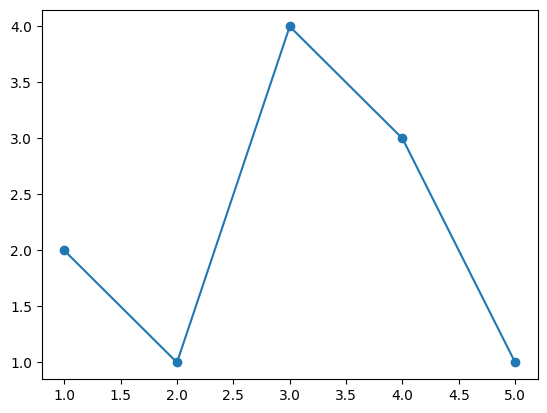

In [17]:
X = [1,2,3,4,5]
Y = [2,1,4,3,1]
plt.plot(X,Y, "-o")

<BarContainer object of 5 artists>

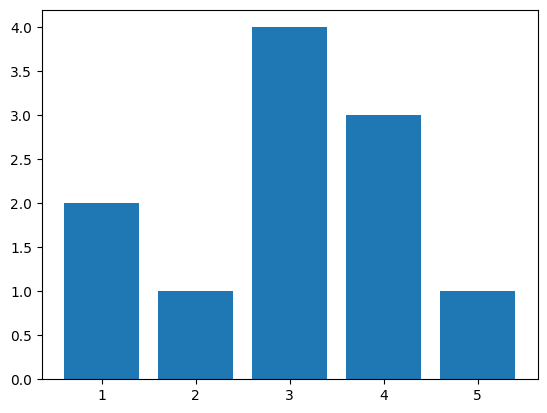

In [18]:
plt.bar(X, Y)

In [21]:
import numpy as np
import time

t1 = time.time()

In [22]:
t2 = time.time()

In [24]:
t1

1689658999.4909363

In [25]:
t2

1689659004.9438539

In [34]:
n = 1000
m = 10000
X = np.random.rand(n,m)
W = np.random.rand(n,1)
Z = np.zeros((1,m))

#행렬연산을 파이썬으로 제어
t1 = time.time()
for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        Z[0][i] += W[j]*X[j][i]

t2 = time.time()
time_python = t2-t1

In [31]:
#같은 행렬 연산을 numpy로 수행
t1 = time.time()
Z = np.dot(W.T, X)
t2 = time.time()
time_numpy = t2-t1
time_numpy

0.004418134689331055

In [35]:
time_python, time_numpy

(30.3179988861084, 0.004418134689331055)

In [36]:
ratio = time_python / time_numpy
ratio

6862.171712265933

In [38]:
ratio/60

114.36952853776555

In [40]:
# Pandas 표 DataFrame(컬럼의 모음)
# 편의점 매출표
# id     상품명    개수   단가    총액   포인트사용액   현금
# 1      새우탕     2     1500    3000       100        2900
# 2      메로나     1     1000    1000       500         500

# id     상품명    개수   
# 1      새우탕       2    
# 2      메로나       1   

# id     상품명    총액   포인트사용액   현금
# 1      새우탕    3000       100        2900
# 2      메로나    1000       500         500

In [31]:
# 컬럼 표현 Series
a = [1,2,3,4]
s1 = pd.Series(a)
s1

0    1
1    2
2    3
3    4
dtype: int64

In [32]:
type(a), type(s1), s1.dtype

(list, pandas.core.series.Series, dtype('int64'))

In [33]:
a = [10,20,30,40]
s2 = pd.Series(a, index=[1,2,3,4])
s2

1    10
2    20
3    30
4    40
dtype: int64

In [34]:
s2[3]

30

In [35]:
a = [10,20,30,40]
s3 = pd.Series(a, index=["1","2","3","4"])
s3

1    10
2    20
3    30
4    40
dtype: int64

In [36]:
s3[3], s3["3"]

(40, 30)

In [37]:
d2 = {1:10, 2:20, 3:30, 4:40} # 딕셔너리 사용하면 한 번에 넣기 가능(인덱스 키 값 따로 안 만듦)
s4 = pd.Series(d2)
s4

1    10
2    20
3    30
4    40
dtype: int64

In [38]:
# 1    10
# 3    30
# dtype: int64

In [39]:
s4[ [1,3] ]

1    10
3    30
dtype: int64

In [40]:
메뉴1 = pd.Series(
{"손님1":5, "손님2":3, "손님3":2, "손님4":1, "손님5":4, "손님6":5})
메뉴1

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: int64

In [41]:
list_1 = ["사과", "배", "포도"]
list_1[1:]

['배', '포도']

In [42]:
메뉴1[3:]

손님4    1
손님5    4
손님6    5
dtype: int64

In [43]:
메뉴1_긍정 = 메뉴1[메뉴1>=4]
메뉴1_긍정

손님1    5
손님5    4
손님6    5
dtype: int64

In [44]:
메뉴1_부정 = 메뉴1[메뉴1<4]
메뉴1_부정

손님2    3
손님3    2
손님4    1
dtype: int64

In [45]:
메뉴1 = 메뉴1.astype("object")
메뉴1

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: object

In [46]:
메뉴1["손님1"]+메뉴1["손님2"]

8

In [47]:
메뉴1 = 메뉴1.astype("int32")
메뉴1

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: int32

In [48]:
메뉴1.index

Index(['손님1', '손님2', '손님3', '손님4', '손님5', '손님6'], dtype='object')

In [49]:
메뉴1.values # 밸류 선택 방법

array([5, 3, 2, 1, 4, 5])

In [50]:
메뉴1.to_numpy() # 밸류 선택 방법

array([5, 3, 2, 1, 4, 5])

In [54]:
메뉴3 = pd.Series([4, 3, 2, 1, 5, 5], index = 메뉴1.index)
메뉴3

손님1    4
손님2    3
손님3    2
손님4    1
손님5    5
손님6    5
dtype: int64

In [113]:
data = [[5,4],
        [3,3],
        [2,2],
        [1,1],
        [4,5],
        [5,5]]
df = pd.DataFrame(data, index=메뉴1.index, columns=["메뉴1", "메뉴2"])
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [114]:
data = {"메뉴1": [5,3,2,1,4,5],
        "메뉴2": [4,3,2,1,5,5]}
df = pd.DataFrame(data, index=메뉴1.index)
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [115]:
data = {"메뉴1": pd.Series([5,3,2,1,4,5], index=메뉴1.index),
        "메뉴2": pd.Series([4,3,2,1,5,5], index=메뉴1.index)}
df = pd.DataFrame(data)
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [1]:
import pandas as pd
df = pd.read_csv("menus.csv", header=None, index_col=0) # 엑셀 파일 읽는 것
df

,1,2
0,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [3]:
df.columns= ["메뉴1", "메뉴2"]
df

,메뉴1,메뉴2
0,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [16]:
df2 = pd.read_csv("menus2.csv", index_col=0) 
df2

,메뉴1,메뉴2
손님,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [17]:
df2.index = ["cus1","cus2","cus3","cus4","cus5","cus6"]
df2.columns = ["짜장", "짬뽕"]
df2

,짜장,짬뽕
cus1,5,4
cus2,3,3
cus3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [18]:
s1 = df2["짜장"] # 시리즈 형식으로 뽑아옴 []를 한번 더 하면 데이터 프레임형식
s1

cus1    5
cus2    3
cus3    2
cus4    1
cus5    4
cus6    5
Name: 짜장, dtype: int64

In [19]:
df_menu1 = df2[["짜장"]] # 데이터 프레임 menu1을 뽑아옴
df_menu1

,짜장
cus1,5
cus2,3
cus3,2
cus4,1
cus5,4
cus6,5


In [20]:
df2["식사부"] = df2["짜장"] + df2["짬뽕"] #새로운 컬럼 추가
df2

,짜장,짬뽕,식사부
cus1,5,4,9
cus2,3,3,6
cus3,2,2,4
cus4,1,1,2
cus5,4,5,9
cus6,5,5,10


In [21]:
df2[["식사부"]]

,식사부
cus1,9
cus2,6
cus3,4
cus4,2
cus5,9
cus6,10


In [22]:
del df2["식사부"] #컬럼 삭제
df2

,짜장,짬뽕
cus1,5,4
cus2,3,3
cus3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [23]:
#rename (columns, index)
df2 = df2.rename(columns={"짜장":"자장"})
df2

,자장,짬뽕
cus1,5,4
cus2,3,3
cus3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [24]:
df2 = df2.rename(index={"cus3":"손님3"})
df2

,자장,짬뽕
cus1,5,4
cus2,3,3
손님3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [26]:
df2.iloc[2,1] #손님3의 짬뽕 값이 나옴 / iloc는 인덱스로 접근이 가능하고 값을 고칠 수 있음

2

In [28]:
df2.iloc[2,1] = 20
df2

,자장,짬뽕
cus1,5,4
cus2,3,3
손님3,2,20
cus4,1,1
cus5,4,5
cus6,5,5


In [30]:
df2.loc["손님3"]["짬뽕"] # 그냥 loc 하면 정수인 인덱스가 아니라 그냥 이름 그대로 적으면 됨

20

In [31]:
df2["짬뽕"]["손님3"] # 컬럼을 먼저 쓰면 굳이 loc 안 써도 됨

20

In [32]:
df2.T # transpose 컬럼과 인덱스의 위치를 바꿈

,cus1,cus2,손님3,cus4,cus5,cus6
자장,5,3,2,1,4,5
짬뽕,4,3,20,1,5,5


In [35]:
df_T = df2.transpose()
df_T

,cus1,cus2,손님3,cus4,cus5,cus6
자장,5,3,2,1,4,5
짬뽕,4,3,20,1,5,5


In [36]:
df_T.iloc[1,2]

20

In [37]:
df_T["손님3"]["짬뽕"]

20

In [38]:
data = [["해찬","고기덮밥"],
["건희","완당"],
["원영","국밥"],
["문규","돈까스"],
["진우","낙지"],
["명서","국수"]]
col = ["이름", "희망메뉴"]
index=["학생1","학생2","학생3","학생4","학생5","학생6"]

In [39]:
lunch = pd.DataFrame(data, columns=col, index = index)
lunch

,이름,희망메뉴
학생1,해찬,고기덮밥
학생2,건희,완당
학생3,원영,국밥
학생4,문규,돈까스
학생5,진우,낙지
학생6,명서,국수


In [40]:
lunch2 = lunch.set_index(["이름"])
lunch2

,희망메뉴
이름,
해찬,고기덮밥
건희,완당
원영,국밥
문규,돈까스
진우,낙지
명서,국수


In [42]:
lunch2.loc["진우"]

희망메뉴    낙지
Name: 진우, dtype: object

In [43]:
lunch2["이름"] = lunch.index
lunch2

,희망메뉴,이름
이름,,
해찬,고기덮밥,학생1
건희,완당,학생2
원영,국밥,학생3
문규,돈까스,학생4
진우,낙지,학생5
명서,국수,학생6


In [44]:
lunch2["가격"] = [10000, 12000, 9000, 11000, 12000, 8000] # 컬럼 추가 및 값 추가
lunch2

,희망메뉴,이름,가격
이름,,,
해찬,고기덮밥,학생1,10000
건희,완당,학생2,12000
원영,국밥,학생3,9000
문규,돈까스,학생4,11000
진우,낙지,학생5,12000
명서,국수,학생6,8000


In [45]:
lunch2.sort_values(by="가격") # 가격을 오름차순으로 새로 정렬함

,희망메뉴,이름,가격
이름,,,
명서,국수,학생6,8000
원영,국밥,학생3,9000
해찬,고기덮밥,학생1,10000
문규,돈까스,학생4,11000
건희,완당,학생2,12000
진우,낙지,학생5,12000


In [46]:
lunch2.sort_values(by="가격", ascending=False) # 가격을 내림차순으로 새로 정렬함

,희망메뉴,이름,가격
이름,,,
건희,완당,학생2,12000
진우,낙지,학생5,12000
문규,돈까스,학생4,11000
해찬,고기덮밥,학생1,10000
원영,국밥,학생3,9000
명서,국수,학생6,8000


In [47]:
lunch2.to_excel("lunch2.xlsx")

In [49]:
lunch2.to_excel("lunch2.xlsx", sheet_name="MySheet1")

In [50]:
lunch3 = lunch2.copy()
lunch3 = lunch3[["희망메뉴"]]
lunch3

,희망메뉴
이름,
해찬,고기덮밥
건희,완당
원영,국밥
문규,돈까스
진우,낙지
명서,국수


In [52]:
writer = pd.ExcelWriter("lunch3.xlsx") # 새로운 파일을 만들고 데이터를 넣음
lunch2.to_excel(writer, sheet_name="lunch2")
lunch3.to_excel(writer, sheet_name="lunch3")
writer._save() # writer.save() 둘 중 하나 쓰면 됨
writer.close()

In [55]:
data = [{"버스":1000, "지하철":2000},
        {"버스":1500, "지하철":2500, "택시":3500}]
idx = ["학생A", "학생B"]
df = pd.DataFrame(data, index = idx)
df # NaN: Not A Number, 유사한 말로는 Na/ Numpy에서는 np.nan / Python에서는 None / 일반 언어에서는 Null

,버스,지하철,택시
학생A,1000,2000,NaN
학생B,1500,2500,3500.0


In [63]:
df.dropna() # 행 자체를 날림 / default axis=0

,버스,지하철,택시
학생B,1500,2500,3500.0


In [64]:
df.dropna(axis=1) # 열 자체를 날림 / axis = 0 은 행을 나타냄

,버스,지하철
학생A,1000,2000
학생B,1500,2500


In [65]:
df = df.fillna(3500)
df

,버스,지하철,택시
학생A,1000,2000,3500.0
학생B,1500,2500,3500.0


In [66]:
import numpy as np
df.iloc[0,2] = np.nan
df

,버스,지하철,택시
학생A,1000,2000,NaN
학생B,1500,2500,3500.0


In [67]:
df = df.fillna(df.mean()) # 평균값
df

,버스,지하철,택시
학생A,1000,2000,3500.0
학생B,1500,2500,3500.0


In [68]:
import matplotlib.pyplot as plt

<Axes: >

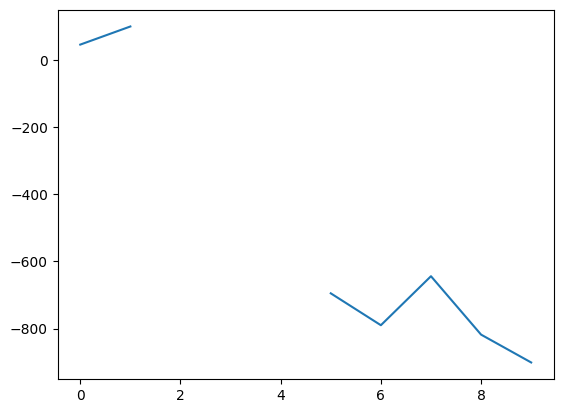

In [70]:
s = pd.Series([46, 100, np.nan, np.nan, np.nan,
              -695, -790, -644, -818, -901])
s.plot()

<Axes: >

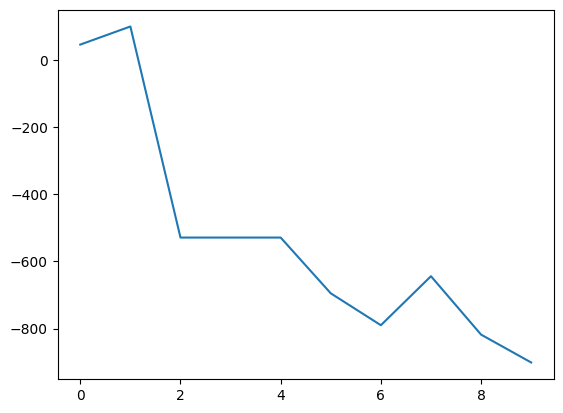

In [71]:
s1 = s.fillna(s.mean()) # 별로 좋지는 않음 / 데이터 양이 많았으면 수직으로 떨어지는 모습이 됨
s1.plot()

<Axes: >

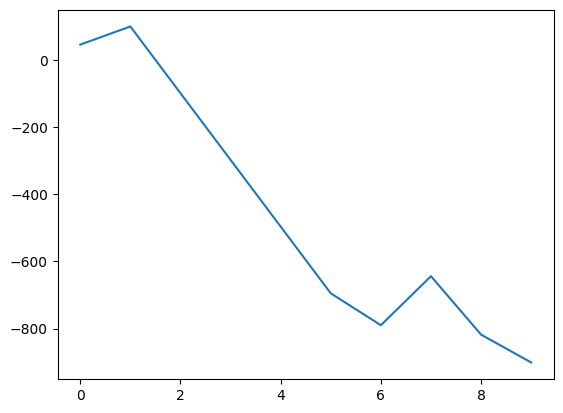

In [72]:
s2 = s.interpolate() # 보기에 평균보다는 괜찮음 / 억지로 fill보다는 이게 나을 듯?
s2.plot()

In [1]:
#!pip install seaborn
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [5]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [6]:
# 데이터 분석 직무(일반 사무직) - domain 지식으로 Machine Learning용 데이터 셋 구성 및 결론 유도
# 데이터 사이언티스트 - Machine Learning 알고리즘 튜닝/새로운 알고리즘으로 ML분석 효율 향상
# 데이터 엔지니어 - 일반 IT 엔지니어

In [7]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [8]:
df3 = df[["survived", "pclass", "sex", "age", "sibsp",  "parch", "fare"]]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
(891-714)/891

0.19865319865319866

In [10]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [14]:
d = {"name":["사과", "바나나", "체리", "두리안", "바나나"],
     "color":["red", "yellow", "red", "yellow", "yellow"]}
fruit_df = pd.DataFrame(d, index = [1, 2, 3, 4, 5])
fruit_df

,name,color
1,사과,red
2,바나나,yellow
3,체리,red
4,두리안,yellow
5,바나나,yellow


In [15]:
fruit_df["name"]

1     사과
2    바나나
3     체리
4    두리안
5    바나나
Name: name, dtype: object

In [16]:
LE = LabelEncoder() # 같은 밸류가 있을 때 같은 숫자로 묶어줌 / 하지만 우선순위로 착각할 수 있기에 별로 좋지 않음
LE.fit_transform(fruit_df["name"])
# ["사과", "바나나", "체리", "두리안", "바나나"]
#([   2,        1,      3,        0,        1])

array([2, 1, 3, 0, 1])

In [17]:
names_df = pd.get_dummies(fruit_df["name"]) # One hot Encoding 
names_df

,두리안,바나나,사과,체리
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False


In [18]:
fruit_df_ohe = pd.concat([names_df,fruit_df["color"]], axis = 1)
fruit_df_ohe

,두리안,바나나,사과,체리,color
1,False,False,True,False,red
2,False,True,False,False,yellow
3,False,False,False,True,red
4,True,False,False,False,yellow
5,False,True,False,False,yellow


In [19]:
from sklearn.preprocessing import OneHotEncoder
name_np = fruit_df["name"].to_numpy() # 넘파이 형태로 바꿈
name_np

array(['사과', '바나나', '체리', '두리안', '바나나'], dtype=object)

In [20]:
name_np = name_np.reshape(-1,1) # ML 할 때 숙어처럼 알아두면 좋음
name_np

array([['사과'],
       ['바나나'],
       ['체리'],
       ['두리안'],
       ['바나나']], dtype=object)

In [21]:
OneHotEncoder().fit_transform(name_np).toarray()

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [22]:
sex_df = pd.get_dummies(df3["sex"]) # One hot Encoding
sex_df

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [23]:
titanic = pd.concat([df3, sex_df], axis=1)
titanic[:2]

,survived,pclass,sex,age,sibsp,parch,fare,female,male
0,0,3,male,22.0,1,0,7.2500,False,True
1,1,1,female,38.0,1,0,71.2833,True,False


In [24]:
del titanic["sex"]

In [25]:
titanic[:2]

,survived,pclass,age,sibsp,parch,fare,female,male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False


In [26]:
# y = f(x)
y = titanic["survived"]
del titanic["survived"]
x = titanic

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [29]:
dt.predict([[3, 22.0, 1, 0, 7.2500, False, True]])

array([0], dtype=int64)

In [30]:
y # 생존을 한 결과

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [118]:
x# 생존을 한 원인

,pclass,age,sibsp,parch,fare,female,male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,True,False
886,2,27.0,0,0,13.0000,False,True
887,1,19.0,0,0,30.0000,True,False
889,1,26.0,0,0,30.0000,False,True


In [80]:
#df["age"].value_counts() #숫자 분포가 다양해서 별 의미 없음

In [56]:
#!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 393.8 kB/s eta 0:00:24
     -                                        0.3/9.2 MB 2.6 MB/s eta 0:00:04
     ----                                     1.0/9.2 MB 6.6 MB/s eta 0:00:02
     ----                                     1.0/9.2 MB 6.6 MB/s eta 0:00:02
     ----                                     1.0/9.2 MB 6.6 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 6.2 MB/s eta 0:00:02
     -------------------                      4.5/9.2 MB 12.6 MB/s eta 0:00:01
     -----------------------------            6.8/9.2 MB 16.1 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 20.3 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 18.5 MB/s eta 0:

In [49]:
from sklearn.datasets import load_iris
Iris = load_iris()
Iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
Iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
Iris.feature_names # 분류할 수 있는 도메인 지식이 필요함(수학적 지식은 크게 필요하지 않음)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
Iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
Iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    Iris.data, Iris.target, test_size=0.2, random_state=300) # 100, 300이 하나 틀림
# iris.data = x, iris.target = y, test_size = ?

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#트레인 세트가 120개, 테스트가 30개 X들은 4개의 컬럼씩 가지고 있고 Y들은 컬럼이 하나다.

((120, 4), (30, 4), (120,), (30,))

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
y_pred = dt.predict(X_test)
y_pred

array([2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 0, 2])

In [116]:
answer = y_test # 틀린 것 5(1->2) 13(1->2)
answer

array([2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 0, 2])

In [117]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred) # 맞춘 점수

0.9666666666666667

In [118]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index= Iris.target_names, columns = Iris.target_names)
cm_df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,8,0
virginica,0,1,8


In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
#accuracy_score, confusion_matrix, precision_score, recall_score
#정확도          혼돈행렬          정밀도           재현율

In [ ]:
precision_score(y_test, y_pred)

In [23]:
import pandas as pd
Xdf = pd.DataFrame(X_test.copy())
Xdf["label"] = y_test
Xdf[:1]

,0,1,2,3,label
0,4.9,2.5,4.5,1.7,2


In [24]:
col = ['sepal length (cm)','sepal width (cm)',
 'petal length (cm)', 'petal width (cm)', "label"]
Xdf.columns = col
Xdf[:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,2.5,4.5,1.7,2


C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


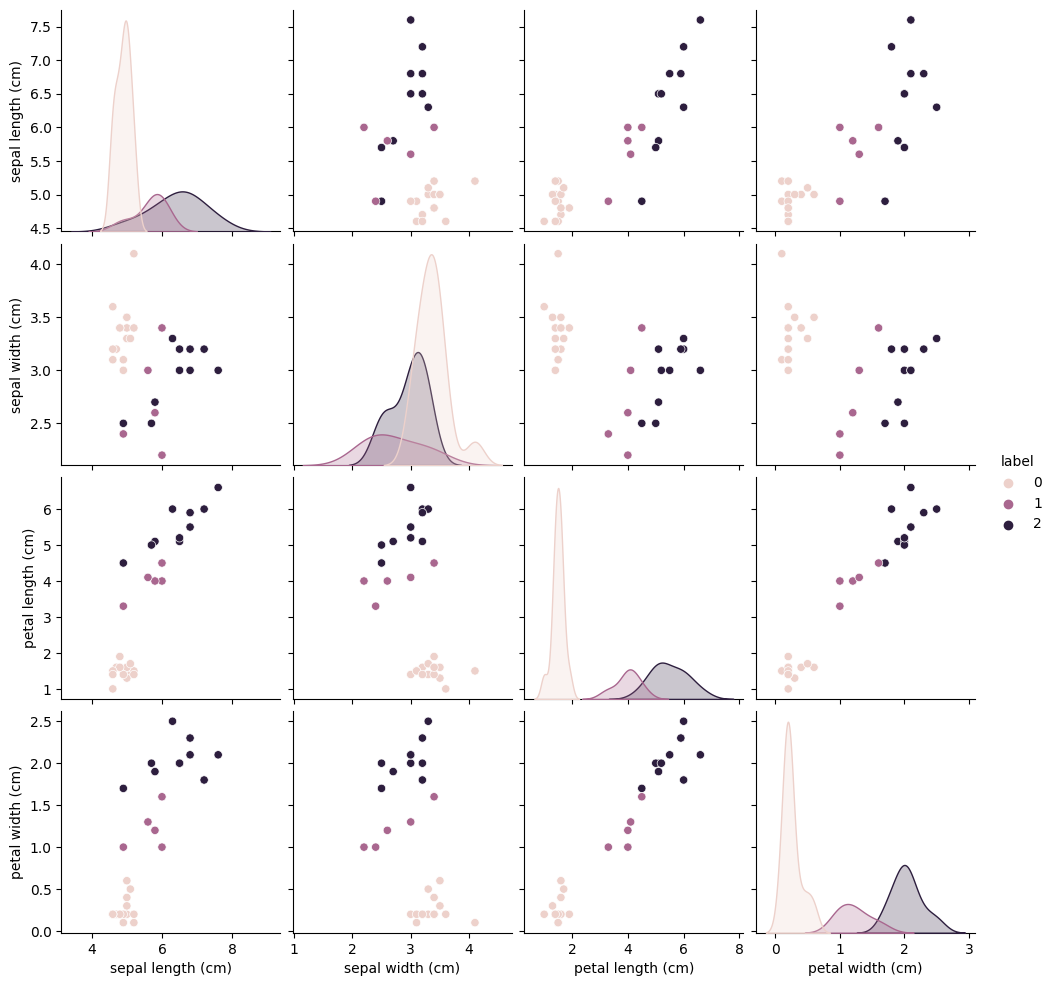

In [26]:
import seaborn as sns
sns.pairplot(Xdf, hue="label")

In [27]:
iris_df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
iris_df[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [28]:
iris_df["label"] = Iris.target
iris_df[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [29]:
iris_df_petal = iris_df.drop(['sepal length (cm)','sepal width (cm)'], axis=1)
iris_df_petal[:2]

,petal length (cm),petal width (cm),label
0,1.4,0.2,0
1,1.4,0.2,0


In [30]:
X = iris_df_petal.iloc[:,:2]
X[:2]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2


In [31]:
y = iris_df_petal.iloc[:,2]
y[:2]

0    0
1    0
Name: label, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Iris.data, Iris.target, test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
dt.predict(X_test)

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0])

In [36]:
y_test

array([1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0])

In [41]:
# fail = 0;
# number = []
# for i in range(len(X_test)):
#     if(challenge[i] != answer[i]):
#         fail += 1
#         number.append(i)
#     else:
#         pass
# (len(X_test)-fail)/len(X_test), number

In [39]:
#from sklearn.metrics import accuracy_score
#accuracy_score(X_test = y_test)

In [40]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

In [46]:
cm_df = pd.DataFrame(cm, index= Iris.target_names, columns = Iris.target_names)
cm_df # confusion_matrix 혼돈 행렬 col: autual 정답, index: prediction ML의 제출 답안

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,6,2
virginica,0,0,10
